In [33]:
using Plots
using Distributions
using StatsBase
using LinearAlgebra
using Printf
using Logging
Logging.disable_logging(Logging.Info)

"include(\"../scripts/robot.jl\")\nimport .RealRobotWorld: RealRobot, RealCamera\nimport .RealRobotWorld: IdealAgent, Agent, Landmark, Map, Camera, Robot, World\nimport .RealRobotWorld: data, decision, state_transition, circle_shape, draw, append\nimport .RealRobotWorld: observation_function\n"

In [34]:
function num(epsilon, delta, binnum) # 必要なパーティクルの数
    return ceil(quantile(Chisq(binnum-1), 1.0-delta)/(2*epsilon))
end

num (generic function with 1 method)

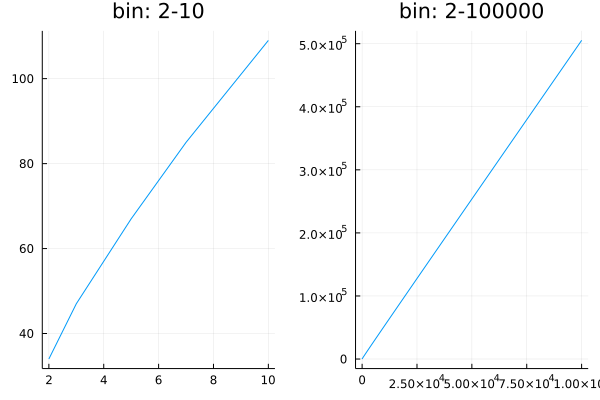

In [35]:
bs = collect(2:10)
n = [num(0.1, 0.01, b) for b in bs]
p1 = plot(bs, n, title="bin: 2-10")

bs = collect(2:100000)
n = [num(0.1, 0.01, b) for b in bs]
p2 = plot(bs, n, title="bin: 2-100000")

plot(p1, p2, layout = (1, 2), legend = false)

In [36]:
function num_wh(epsilon, delta, binnum)
    dof = binnum-1
    z = quantile(Normal(), 1.0-delta)
    return ceil(dof/(2*epsilon)*(1-2/(9*dof) + sqrt(2/(9*dof))*z)^3)
end

num_wh (generic function with 1 method)

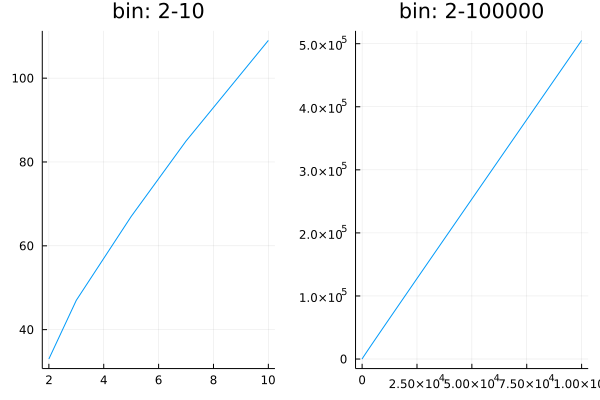

In [37]:
bs = collect(2:10)
n = [num_wh(0.1, 0.01, b) for b in bs]
p1 = plot(bs, n, title="bin: 2-10")

bs = collect(2:100000)
n = [num_wh(0.1, 0.01, b) for b in bs]
p2 = plot(bs, n, title="bin: 2-100000")

plot(p1, p2, layout = (1, 2), legend = false)